Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.layers import Dropout, Dense
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.models import Sequential

Data Loading

In [ ]:
data = pd.read_excel("PS206767-553247439.xls")
data=data.head(5700)
df=data
data

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus,Comments regarding Project Site Dataset
0,PharmGKB Subject ID,PA135312629,1.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.040,...,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN,Project 1:
1,PharmGKB Subject ID,PA135312630,1.0,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.530,...,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C,Warfarin Therapeutic Dose Definition:
2,PharmGKB Subject ID,PA135312631,1.0,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.560,...,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN,The dose (unchanged for 6 days) that yielded a...
3,PharmGKB Subject ID,PA135312632,1.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.245,...,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN,NaN
4,PharmGKB Subject ID,PA135312633,1.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.640,...,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,PharmGKB Subject ID,PA152407969,21.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,20 - 29,185.420,...,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,PharmGKB Subject ID,PA152407970,21.0,female,White,White,not Hispanic or Latino,not Hispanic or Latino,70 - 79,160.020,...,NaN,*1/*3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5697,PharmGKB Subject ID,PA152407971,21.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,187.960,...,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,PharmGKB Subject ID,PA152407972,21.0,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,177.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Statistical Analysis

In [ ]:
numerical_columns =  [ 'Age', 'Height (cm)', 'Weight (kg)',  'INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin']
print("Statistics of Features: ", data[numerical_columns].describe())

Statistics of Features:         Height (cm)  Weight (kg)  INR on Reported Therapeutic Dose of Warfarin  \
count  4554.000000  5413.000000                                   4968.000000   
mean    168.047778    77.852569                                      2.364438   
std      10.845992    21.859764                                      0.464644   
min     124.968000    30.000000                                      0.800000   
25%     160.020000    62.000000                                      2.100000   
50%     167.894000    75.000000                                      2.400000   
75%     176.022000    90.000000                                      2.610000   
max     202.000000   237.700000                                      6.100000   

       Therapeutic Dose of Warfarin  
count                   5528.000000  
mean                      30.977887  
std                       16.801048  
min                        2.100000  
25%                       19.530000  
50%              

array([[<Axes: title={'center': 'Height (cm)'}>,
        <Axes: title={'center': 'Weight (kg)'}>],
       [<Axes: title={'center': 'INR on Reported Therapeutic Dose of Warfarin'}>,
        <Axes: title={'center': 'Therapeutic Dose of Warfarin'}>]],
      dtype=object)

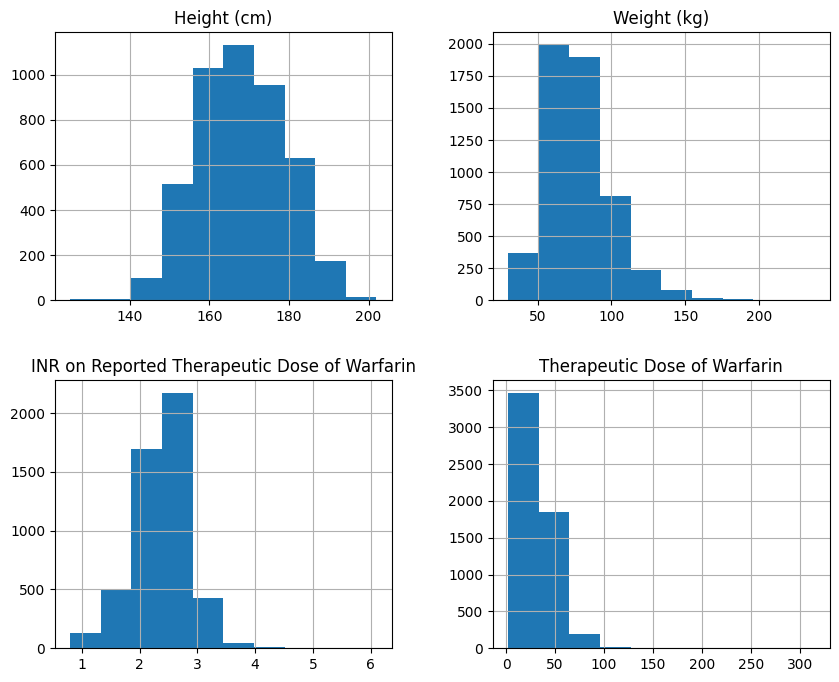

In [ ]:
#create histogram
data[numerical_columns].hist(bins=10, figsize=(10,8))

Feature Selection

<ipython-input-68-5b30157d8e54>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[feature_columns].corr(),annot=True, cmap ='coolwarm')


<Axes: >

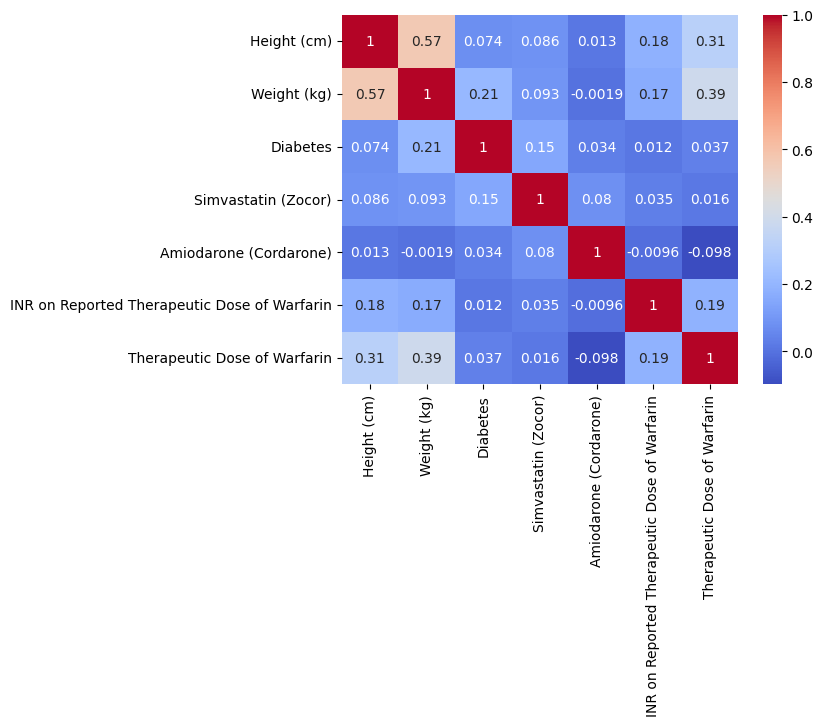

In [ ]:
#correlations Analysis 
feature_columns = ['Gender', 'Age', 'Race (Reported)', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'INR on Reported Therapeutic Dose of Warfarin','VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'Therapeutic Dose of Warfarin']
sns.heatmap(df[feature_columns].corr(),annot=True, cmap ='coolwarm')


In [ ]:
#Drop the columns that are not correlated with targeted column i.e 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
# clinical_features = ['Gender', 'Age', 'Race (Reported)', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'INR on Reported Therapeutic Dose of Warfarin','VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'Therapeutic Dose of Warfarin']
clinical_features = [ 'Age','Height (cm)', 'Weight (kg)',  'INR on Reported Therapeutic Dose of Warfarin','VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'Therapeutic Dose of Warfarin']
data =  data[clinical_features]
data.dropna(inplace=True)

<ipython-input-69-d1f96c664629>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Handling Missig values using Mean and Median mputations

In [ ]:
missing_values_col = [ 'Age', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
for i in missing_values_col:
    data[i] = data[i].fillna(data[i].mode()[0])

numerical_columns = ['Height (cm)', 'Weight (kg)', 'INR on Reported Therapeutic Dose of Warfarin','Therapeutic Dose of Warfarin']
for column in numerical_columns:
    data[column] = data[column].replace(np.NaN, int(df[column].mean(skipna=True)))

<ipython-input-70-591350ec7a42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].fillna(data[i].mode()[0])
<ipython-input-70-591350ec7a42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].fillna(data[i].mode()[0])
<ipython-input-70-591350ec7a42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Convert Categorical Columns to Numerical Columns - Label Encoding

In [ ]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
encode_columns = ['Age', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']
for column in encode_columns:
  data[column] = label_encoder.fit_transform(data[column])
age_encoded = onehot_encoder.fit_transform(data['Age'].values.reshape(-1, 1))
amiodarone_encoded = onehot_encoder.fit_transform(data['VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T'].values.reshape(-1, 1))

# concatenate the input_features
X = np.hstack((data[['Age', 'Height (cm)', 'Weight (kg)']].values,amiodarone_encoded,age_encoded))
y = data['Therapeutic Dose of Warfarin'].values


<ipython-input-71-c4c017270d46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
<ipython-input-71-c4c017270d46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to it

#  Ensemble Learning and Random Forest

In [ ]:
# Define models
base_models = [Ridge(alpha=0.1),
               Lasso(alpha=0.1),
               KNeighborsRegressor(n_neighbors=10),
               DecisionTreeRegressor(max_depth=5),
               SVR(kernel='linear'),
               SVR(kernel='rbf'),
               RandomForestRegressor(n_estimators=10),
               GradientBoostingRegressor(n_estimators=10)]

meta_model = GradientBoostingRegressor(n_estimators=100)

# Define ensemble model
ensemble = StackingCVRegressor(regressors=base_models, meta_regressor=meta_model, cv=KFold(n_splits=10, shuffle=True, random_state=42), use_features_in_secondary=True)

#split train and testing dataset
y=np.sqrt(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training dataset
ensemble.fit(X_train, y_train)

# Make predictions 
y_pred = ensemble.predict(X_test)

# Calculate evaluation metrics
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred)*100)

MAE: 0.7956680926703984
MSE: 1.0884451920708171
RMSE: 1.0432857672137663
R-squared: 43.8352567976777


# Stacked Genralization Regression Model (Linear, RandomForest and GradientBoostingRegression )
Here we use K cross validation technique to avoid overfitting in the Model

In [ ]:
# Define the base_models
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]

_model = LinearRegression()

# Our stacked generalization model
stacked_model = StackingCVRegressor(regressors=models, meta_regressor=_model, cv=KFold(n_splits=5, shuffle=True, random_state=42))
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Evaluation Metrics
print('MAE of Stacked Genralization Regression Model :', mean_absolute_error(y_test, y_pred))
print('MSE if Stacked Genralization Regression Model :', mean_squared_error(y_test, y_pred))
print('RMSE of Stacked Genralization Regression Model :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared f Stacked Genralization Regression Model :', r2_score(y_test, y_pred)*100)

MAE of Stacked Genralization Regression Model : 0.7803609819561005
MSE if Stacked Genralization Regression Model : 1.0441936342200677
RMSE of Stacked Genralization Regression Model : 1.0218579325033728
R-squared f Stacked Genralization Regression Model : 46.11867667136148


# Classifctaion Algorithm: Logistic Regression

 Logistic Regression Accuracy:  76.16747181964574
 Logistic Regression Precision:  0.7385892116182573
 Logistic Regression Recall:  0.6768060836501901
 Logistic Regression F1 score:  0.7063492063492064
 Logistic Regression Specificity:  0.7385892116182573
 Logistic Regression Sensitivity:  0.7763157894736842


<ipython-input-74-6eb0d4cab7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_binary'] = np.where(data['Therapeutic Dose of Warfarin'] > 30, 1, 0)


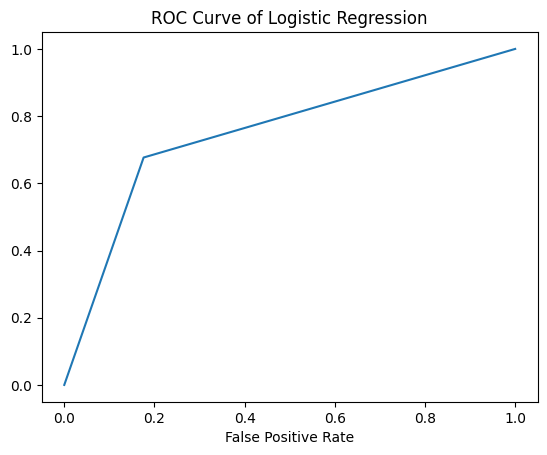

In [ ]:
# output variable ('Therapeutic Dose of Warfarin') can also be converted into binary classes. The first class contains patients
#who require doses of >30 mg/wk (high required dose (HRD))and the second class contains the patients who need doses of ≤30 mg/wk (low required dose (LRD)).
data['y_binary'] = np.where(data['Therapeutic Dose of Warfarin'] > 30, 1, 0)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Therapeutic Dose of Warfarin', 'y_binary'], axis=1), data['y_binary'], test_size=0.2, random_state=42)

# Train the Classification Model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
TP, FP, FN, TN = confusion_matrix(y_test, y_pred).ravel()
sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
#compute ROC ciurve
FPR, TPR, Thres = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR,TPR)

# Plot ROC curve
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.title('ROC Curve of Logistic Regression')
plt.xlabel('False Positive Rate')
print(" Logistic Regression Accuracy: ",accuracy*100)
print(" Logistic Regression Precision: ", precision)
print(" Logistic Regression Recall: ", recall)
print(" Logistic Regression F1 score: ", f1)
print(" Logistic Regression Specificity: ", Specificity)
print(" Logistic Regression Sensitivity: ", sensitivity)

# Decision Trees

 Decision Trees Accuracy:  64.89533011272141
 Decision Trees Precision:  0.5882352941176471
 Decision Trees Recall:  0.5703422053231939
 Decision Trees F1 score:  0.5791505791505792
 Decision Trees Specificity:  0.5882352941176471
 Decision Trees Sensitivity:  0.6912568306010929


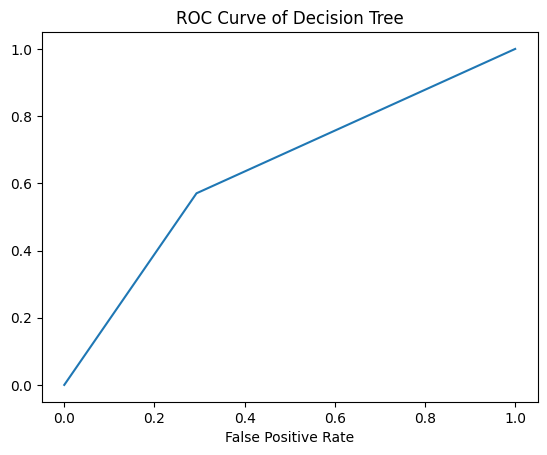

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the targeted column
y_pred = classifier.predict(X_test)
#Ealuation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
TP, FP, FN, TN = confusion_matrix(y_test, y_pred).ravel()
#Sensitivity
sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
#compute ROC ciurve
FPR, TPR, Thres = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR,TPR)

# Plot ROC curve
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.title('ROC Curve of Decision Tree')
plt.xlabel('False Positive Rate')
print(" Decision Trees Accuracy: ",accuracy*100)
print(" Decision Trees Precision: ", precision)
print(" Decision Trees Recall: ", recall)
print(" Decision Trees F1 score: ", f1)
print(" Decision Trees Specificity: ", Specificity)
print(" Decision Trees Sensitivity: ", sensitivity)

# Support Vector Machine

 SVM Classifier Accuracy:  70.53140096618358
 SVM Classifier Precision:  0.6785714285714286
SVM Classifier Recall:  0.5779467680608364
 SVM Classifier F1 score:  0.6242299794661191
 SVM Classifier Specificity:  0.6785714285714286
 SVM Classifier Sensitivity:  0.7204030226700252
SVM Regressor RMSE:  0.47342949008187424
SVM Regressor MAE: 0.35104669887278583
SVM Regressor R-squared: -0.4378358858890754
One-Class SVM detected 384 outliers in the test set.


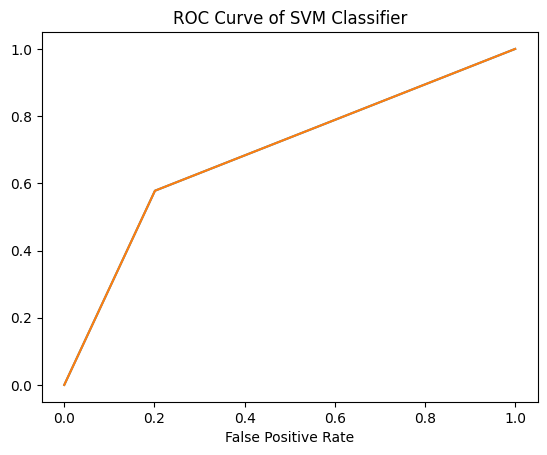

In [ ]:
# SVM Classifier
SVC= SVC(kernel='rbf', gamma='auto', random_state=42)
SVC.fit(X_train, y_train)
svm_prediction = SVC.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_prediction)
precision = precision_score(y_test, svm_prediction)
recall = recall_score(y_test, svm_prediction)
f1 = f1_score(y_test, svm_prediction)
TP, FP, FN, TN = confusion_matrix(y_test, svm_prediction).ravel()
#compute ROC ciurve
FPR, TPR, Thres = roc_curve(y_test, svm_prediction)
ROC_AUC = auc(FPR,TPR)

# Plot ROC curve
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.title('ROC Curve of SVM Classifier')
plt.xlabel('False Positive Rate')
#Sensitivity
sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
print(" SVM Classifier Accuracy: ",svm_accuracy*100)
print(" SVM Classifier Precision: ", precision)
print("SVM Classifier Recall: ", recall)
print(" SVM Classifier F1 score: ", f1)
print(" SVM Classifier Specificity: ", Specificity)
print(" SVM Classifier Sensitivity: ", sensitivity)
#compute ROC ciurve
FPR, TPR, Thres = roc_curve(y_test,  svm_prediction)
ROC_AUC = auc(FPR,TPR)

# Plot ROC curve
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC)

# SVM Regressor
regressor = SVR(kernel='rbf', gamma='auto')
regressor.fit(X_train, y_train)
regressor_pred = regressor.predict(X_test)
regressor_rmse = mean_squared_error(y_test, regressor_pred, squared=False)
print("SVM Regressor RMSE: ", (regressor_rmse))
print('SVM Regressor MAE:', mean_absolute_error(y_test, y_pred))
print('SVM Regressor R-squared:', r2_score(y_test, y_pred))

# One-class SVM for outlier detection
one_class_svm = OneClassSVM(kernel='rbf', gamma='auto')
one_class_svm.fit(X_train)
one_class_pred = one_class_svm.predict(X_test)
outlier_count = list(one_class_pred).count(-1)
print("One-Class SVM detected {} outliers in the test set.".format(outlier_count))

# Artifical Neural Network - Deep Learning Algorithm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    # Compile the model
    optimizer = Adam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

    return model

# Hyperparameter tuning using GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0)
param_grid = {
    'batch_size': [32, 64],
    'epochs': [50, 100],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)

#Best Hyperparameters
print("Best Hyperparameters: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

model = create_model()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
#Evaluation
print("MAE of Artficial Neural Network: ", mean_absolute_error(y_test, y_pred))
print("MSE of Artficial Neural Network:: ", mean_squared_error(y_test, y_pred))
print('RMSE of Artficial Neural Network::', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared of Artficial Neural Network::', r2_score(y_test, y_pred)*100)


<ipython-input-82-4042b3d87315>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Hyperparameters: -1.266676 using {'batch_size': 32, 'epochs': 100}
20/20 [==============================] - 0s 1ms/step
MAE of Artficial Neural Network:  0.8062036817823794
MSE of Artficial Neural Network::  1.0886552478710647
RMSE of Artficial Neural Network:: 1.0433864326658004
R-squared of Artficial Neural Network:: 43.82441773093828
